In [4]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import analysis
importlib.reload(analysis)
%matplotlib inline

In [5]:
analyzer = analysis.ResultAnalyzer()
analyzer.readData()

netID: jef283, keyNum: 123123123, First condition score: 16, Second condition score: 19
netID: krk66, keyNum: 4340870324, First condition score: 16, Second condition score: 22
netID: atf39, keyNum: Coverage and specificity, First condition score: 12, Second condition score: 15
netID: lm573, keyNum: None, First condition score: 19, Second condition score: 17
netID: mac389, keyNum: 3306569930, First condition score: 20, Second condition score: 19
netID: sp2274, keyNum: 4334445073, First condition score: 21, Second condition score: 19
netID: hgp8, keyNum: 64402823, First condition score: 17, Second condition score: 16
netID: kpd43, keyNum: 3137288120, First condition score: 17, Second condition score: 22
netID: gwp37, keyNum: 2620672040, First condition score: 16, Second condition score: 22
netID: hw585, keyNum: 2133534586, First condition score: 15, Second condition score: 20
netID: jc2367, keyNum: 9191698327, First condition score: 17, Second condition score: 20
netID: yk724, keyNum: yk

In [6]:
def plotBarGraph(mean1, stdev1, mean2, stdev2):

    N = 2
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    means = (mean1, mean2)
    stdevs = (stdev1, stdev2)

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, means, width, color='r', yerr=stdevs)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('Scores')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('1', '2'))

    #ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

    plt.show()

In [7]:
def plotECDF(scores1,scores2):
    
    import statsmodels.api as sm # recommended import according to the docs

    sample = scores1
    ecdf = sm.distributions.ECDF(scores1)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.step(x, y)

    sample2 = scores2
    ecdf = sm.distributions.ECDF(sample2)
    x = np.linspace(min(sample2), max(sample2))
    y = ecdf(x)
    plt.step(x, y)

    plt.show()

In [8]:
def writeToFile(data, header ,filePath = "/Users/bang/workspace/iFEED-experiment-201711-result/data/data.csv"):
    with open(filePath, 'w') as f:
        f.write(header + "\n")
        for row in data:
            f.write(",".join(row) + "\n")
    

## All subjects

In [9]:
subjects = analyzer.results
len(subjects)

31

First Condition Score Mean: 18.225806451612904, Second Condition Score Mean: 19.06451612903226
First Condition Score Stdev: 2.847859155399128, Second Condition Score Stdev: 2.5770135737743547


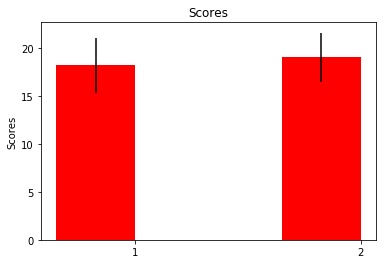

In [10]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects)
plotBarGraph(m1,s1,m2,s2)

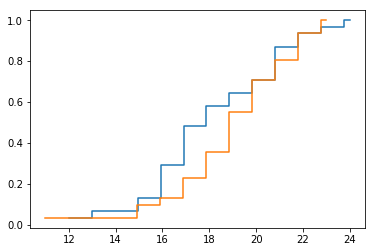

In [11]:
f1,f2 = analyzer.getScoreData(subjects)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

## All subjects - ordering

In [12]:
subjects_ordering = analyzer.results
len(subjects_ordering)

31

First Task Score Mean: 18.161290322580644, Second Task Score Mean: 19.129032258064516
First Task Score Stdev: 2.885970225334844, Second Task Score Stdev: 2.511161349164976


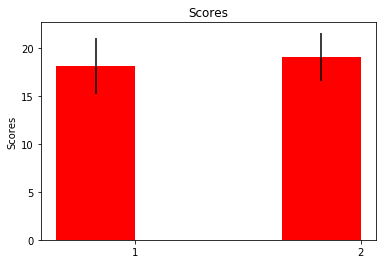

In [13]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects_ordering, order_effect=True)
plotBarGraph(m1,s1,m2,s2)

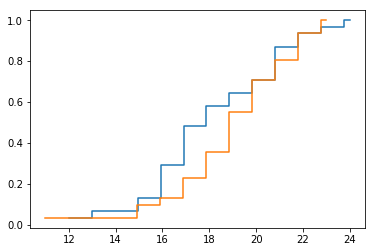

In [14]:
f1,f2 = analyzer.getScoreData(subjects_ordering)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First Task, Second Task")
plotECDF(f1,f2)

## STEM majors

In [15]:
STEM_majors = analyzer.filterByDemographics(STEM=True)
len(STEM_majors)

24

First Condition Score Mean: 18.833333333333332, Second Condition Score Mean: 19.75
First Condition Score Stdev: 2.592724864350674, Second Condition Score Stdev: 2.0463381929681126


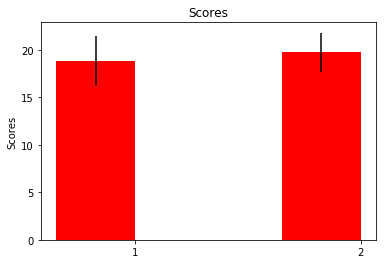

In [16]:
m1,m2,s1,s2 = analyzer.printStatistics(STEM_majors)
plotBarGraph(m1,s1,m2,s2)

## Identified as having prior experience

In [17]:
subjects_with_prior_experience = analyzer.filterByDemographics(prior_experience=True)
len(subjects_with_prior_experience)

10

First Condition Score Mean: 17.1, Second Condition Score Mean: 20.6
First Condition Score Stdev: 1.8138357147217055, Second Condition Score Stdev: 1.562049935181331


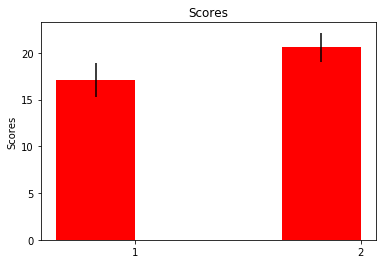

In [18]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects_with_prior_experience)
plotBarGraph(m1,s1,m2,s2)

## Taking SYSEN5400

In [19]:
subjects_taking_SYSEN5400 = analyzer.filterByDemographics(SYSEN5400=True)
len(subjects_taking_SYSEN5400)

13

First Condition Score Mean: 17.615384615384617, Second Condition Score Mean: 20.923076923076923
First Condition Score Stdev: 1.9821690348807885, Second Condition Score Stdev: 1.3846153846153846


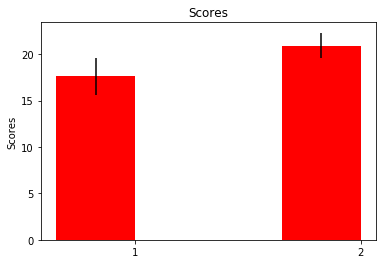

In [20]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects_taking_SYSEN5400)
plotBarGraph(m1,s1,m2,s2)

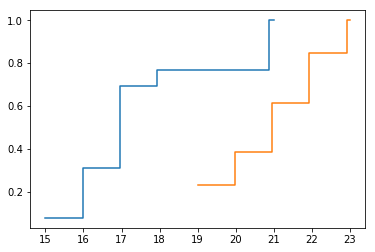

In [21]:
f1,f2 = analyzer.getScoreData(subjects_taking_SYSEN5400)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

## Not taking SYSEN5400

In [22]:
subjects_not_taking_SYSEN5400 = analyzer.filterByDemographics(NoSYSEN5400=True)
len(subjects_not_taking_SYSEN5400)

18

First Condition Score Mean: 18.666666666666668, Second Condition Score Mean: 17.72222222222222
First Condition Score Stdev: 3.265986323710904, Second Condition Score Stdev: 2.3992025424099093


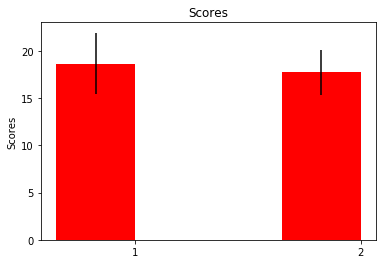

In [23]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects_not_taking_SYSEN5400)
plotBarGraph(m1,s1,m2,s2)

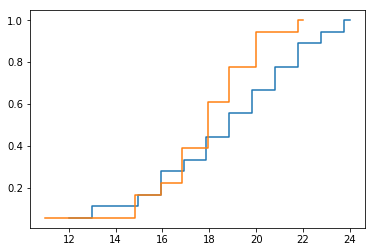

In [24]:
f1,f2 = analyzer.getScoreData(subjects_not_taking_SYSEN5400)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

## Non STEM Major

In [25]:
non_STEM_subjects = analyzer.filterByDemographics(NonSTEM=True)
len(non_STEM_subjects)

7

First Condition Score Mean: 16.142857142857142, Second Condition Score Mean: 16.714285714285715
First Condition Score Stdev: 2.695423180587601, Second Condition Score Stdev: 2.813959371941744


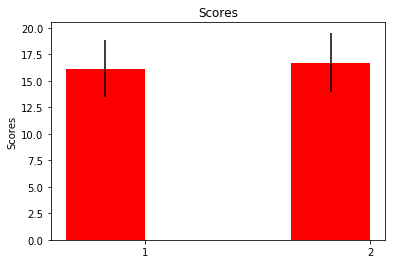

In [26]:
m1,m2,s1,s2 = analyzer.printStatistics(non_STEM_subjects)
plotBarGraph(m1,s1,m2,s2)

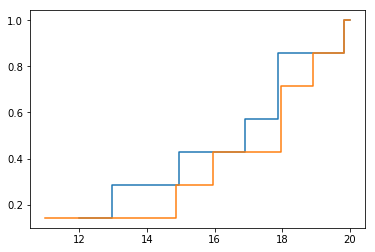

In [27]:
f1,f2 = analyzer.getScoreData(non_STEM_subjects)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

(array([  1.,   2.,  10.,   3.,   4.,   6.,   2.]),
 array([ 48.        ,  54.85714286,  61.71428571,  68.57142857,
         75.42857143,  82.28571429,  89.14285714,  96.        ]),
 <a list of 7 Patch objects>)

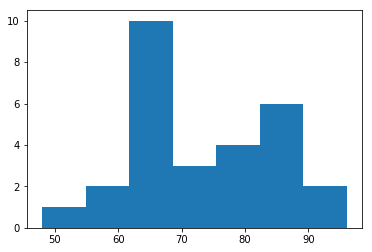

In [12]:
plt.hist(analyzer.first_condition_scores,bins=7)

(array([ 3.,  3.,  4.,  6.,  5.,  3.,  4.]),
 array([ 60.        ,  64.57142857,  69.14285714,  73.71428571,
         78.28571429,  82.85714286,  87.42857143,  92.        ]),
 <a list of 7 Patch objects>)

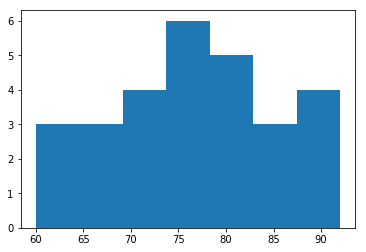

In [13]:
plt.hist(analyzer.second_condition_scores,bins=7)